<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/Prac_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
dataset, info = tfds.load("rock_paper_scissors", as_supervised=True, with_info=True)
dataset

{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
info.features["image"]

Image(shape=(300, 300, 3), dtype=tf.uint8)

In [ ]:
info.splits

{'test': <tfds.core.SplitInfo num_examples=372>,
 'train': <tfds.core.SplitInfo num_examples=2520>}

In [ ]:
info.splits["train"]

<tfds.core.SplitInfo num_examples=2520>

In [ ]:
class_names = info.features["label"].names
class_names

['rock', 'paper', 'scissors']

In [ ]:
n_classes = info.features["label"].num_classes
dataset_size = info.splits["train"].num_examples
dataset_size

2520

### Dataset을 Training, Validation, Test set으로 나누어 받기

In [1]:
import tensorflow_datasets as tfds
import numpy as np

test_set_raw, valid_set_raw, train_set_raw = tfds.load("rock_paper_scissors", as_supervised=True,split=["train[:10%]", "train[10%:25%]","train[25%:]"])
batch_size= 252
#train_set =train_set_raw.batch(len(train_set_raw)).prefetch(1)
#valid_set = valid_set_raw.batch(len(valid_set_raw)).prefetch(1)
#test_set = test_set_raw.batch(len(test_set_raw)).prefetch(1)


In [2]:
import tensorflow as tf
from tensorflow import keras

#INPUT_IMG_SIZE = 100

def change_img(image,label):
  image = tf.cast(image, tf.float32)
  image = image/ 255.
  #image = tf.image.resize(image, [INPUT_IMG_SIZE,INPUT_IMG_SIZE])
  return image, label

### 모델 1(Fashion MNIST CNN 변형)

In [3]:
from functools import partial
batch_size = 32

train_set = train_set_raw.map(partial(change_img)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(change_img).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(change_img).batch(batch_size).prefetch(1)

##### 가위 바위 보 데이터 모델

In [4]:
from functools import partial
import tensorflow as tf
from tensorflow import keras

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=16, kernel_size=7, input_shape=[300,300,3]),
    DefaultConv2D(filters=32),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=3, activation='softmax'),                                                             
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(train_set, epochs=10, validation_data=valid_set,callbacks=early_stopping)

Epoch 1/10
60/60 [==============================] - 507s 8s/step - loss: 1.2754 - accuracy: 0.3688 - val_loss: 1.0935 - val_accuracy: 0.3651
Epoch 2/10
60/60 [==============================] - 510s 9s/step - loss: 1.0390 - accuracy: 0.5037 - val_loss: 0.8337 - val_accuracy: 0.7593
Epoch 3/10
60/60 [==============================] - 505s 8s/step - loss: 0.8494 - accuracy: 0.6545 - val_loss: 0.8017 - val_accuracy: 0.6825
Epoch 4/10
60/60 [==============================] - 508s 8s/step - loss: 0.6810 - accuracy: 0.7704 - val_loss: 0.7674 - val_accuracy: 0.7434
Epoch 5/10
60/60 [==============================] - 504s 8s/step - loss: 0.5633 - accuracy: 0.8386 - val_loss: 0.3941 - val_accuracy: 0.9921
Epoch 6/10
60/60 [==============================] - 504s 8s/step - loss: 0.4617 - accuracy: 0.8799 - val_loss: 0.3380 - val_accuracy: 0.9762
Epoch 7/10
60/60 [==============================] - 506s 8s/step - loss: 0.4039 - accuracy: 0.9101 - val_loss: 0.3103 - val_accuracy: 0.9683
Epoch 8/10
60

In [6]:
model.evaluate(test_set)

8/8 [==============================] - 16s 2s/step - loss: 0.2305 - accuracy: 0.9881


[0.230536550283432, 0.988095223903656]

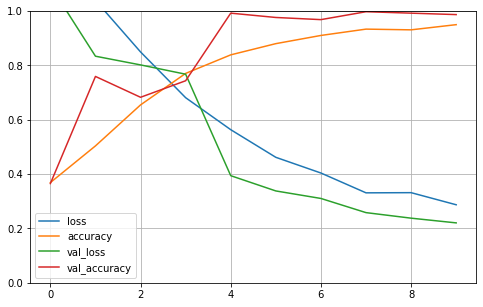

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
#save_fig("keras_learning_curves_plot")
plt.show()